Modelo 'modelo_diabetes' treinado com sucesso.
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        79
           1       0.89      0.81      0.85        21

    accuracy                           0.94       100
   macro avg       0.92      0.89      0.91       100
weighted avg       0.94      0.94      0.94       100

Matriz de Confusão:
[[77  2]
 [ 4 17]]
Acurácia treino: 0.99
Acurácia teste: 0.94


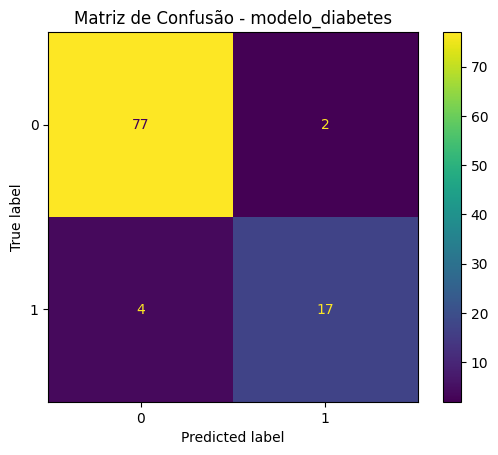

Modelo 'modelo_hipertensao' treinado com sucesso.
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        66
           1       0.82      0.94      0.88        34

    accuracy                           0.91       100
   macro avg       0.89      0.92      0.90       100
weighted avg       0.92      0.91      0.91       100

Matriz de Confusão:
[[59  7]
 [ 2 32]]
Acurácia treino: 1.00
Acurácia teste: 0.91


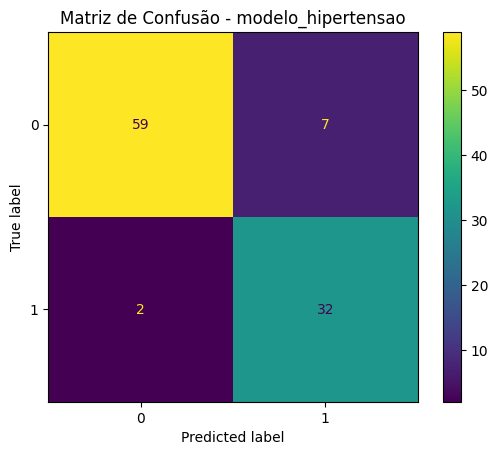

C:\Users\deyvi\AppData\Local\Temp\ipykernel_4332\2715698510.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return df.replace({'F': 0, 'M': 1})
c:\Users\deyvi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\deyvi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi

Modelo 'modelo_drc' treinado com sucesso.
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.97      1.00      0.98        97

    accuracy                           0.97       100
   macro avg       0.48      0.50      0.49       100
weighted avg       0.94      0.97      0.96       100

Matriz de Confusão:
[[ 0  3]
 [ 0 97]]
Acurácia treino: 1.00
Acurácia teste: 0.97


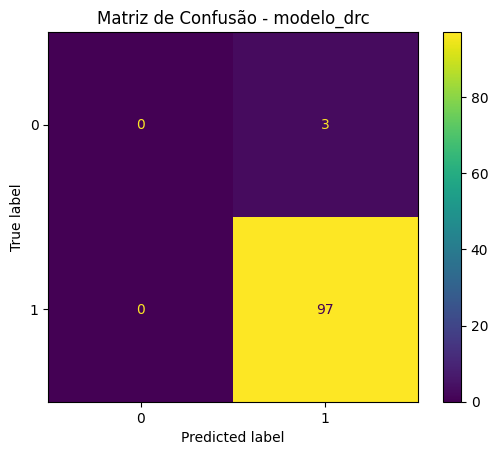

Modelo 'modelo_dpoc' treinado com sucesso.
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.94      0.95      0.95        64

    accuracy                           0.93       100
   macro avg       0.93      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100

Matriz de Confusão:
[[32  4]
 [ 3 61]]
Acurácia treino: 0.98
Acurácia teste: 0.93


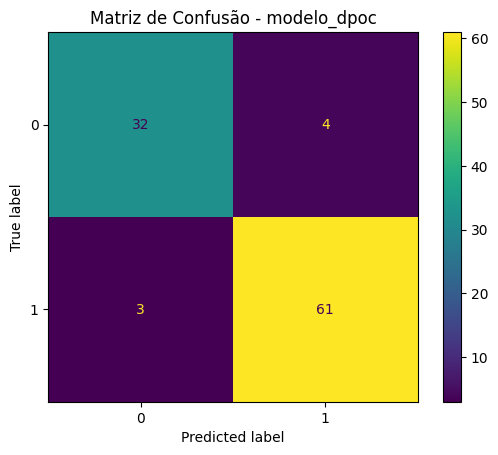

Modelo 'modelo_asma' treinado com sucesso.
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        26
           1       0.99      0.97      0.98        74

    accuracy                           0.97       100
   macro avg       0.96      0.97      0.96       100
weighted avg       0.97      0.97      0.97       100

Matriz de Confusão:
[[25  1]
 [ 2 72]]
Acurácia treino: 0.98
Acurácia teste: 0.97


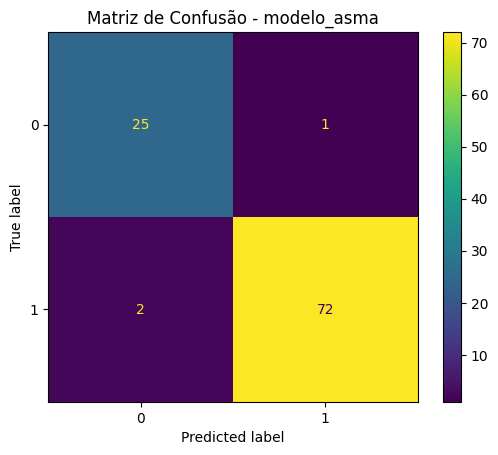

C:\Users\deyvi\AppData\Local\Temp\ipykernel_4332\2715698510.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return df.replace({'feminino': 0, 'masculino': 1})


Modelo 'modelo_obesidade' treinado com sucesso.
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        61
           1       0.92      0.90      0.91        39

    accuracy                           0.93       100
   macro avg       0.93      0.92      0.93       100
weighted avg       0.93      0.93      0.93       100

Matriz de Confusão:
[[58  3]
 [ 4 35]]
Acurácia treino: 0.99
Acurácia teste: 0.93


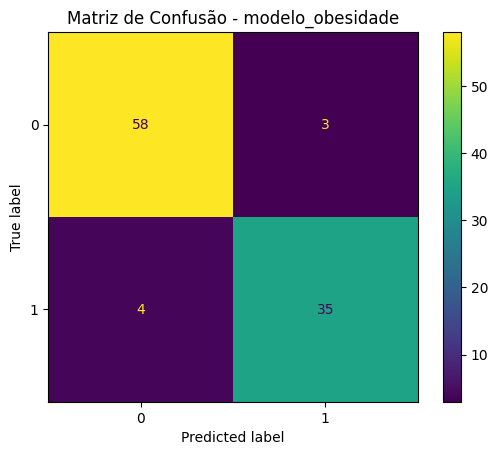

Modelo 'modelo_aids' treinado com sucesso.
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        30
           1       0.93      0.90      0.91        70

    accuracy                           0.88       100
   macro avg       0.85      0.87      0.86       100
weighted avg       0.88      0.88      0.88       100

Matriz de Confusão:
[[25  5]
 [ 7 63]]
Acurácia treino: 0.98
Acurácia teste: 0.88


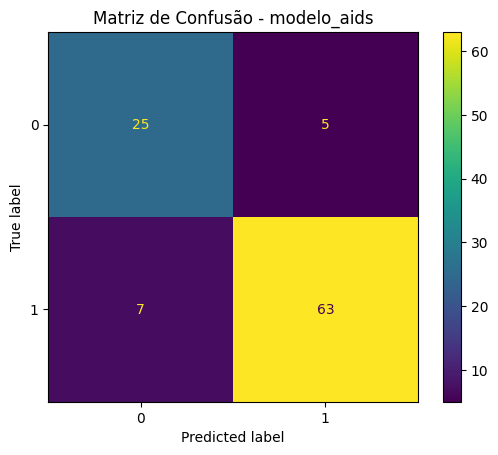

Modelo 'modelo_ossea' treinado com sucesso.
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.94      0.94      0.94        71

    accuracy                           0.92       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.92      0.92      0.92       100

Matriz de Confusão:
[[25  4]
 [ 4 67]]
Acurácia treino: 0.96
Acurácia teste: 0.92


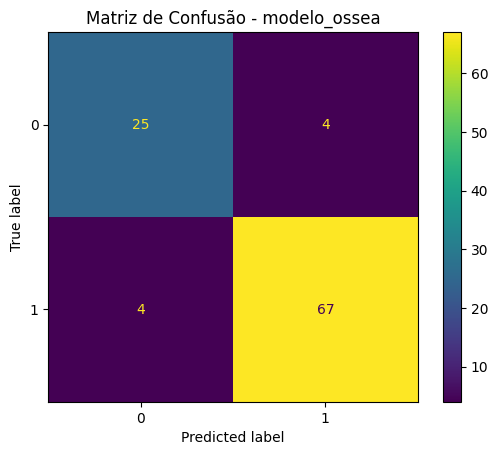

Modelo 'modelo_cardiovascular' treinado com sucesso.
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        32
           1       0.91      0.94      0.93        68

    accuracy                           0.90       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.90      0.90      0.90       100

Matriz de Confusão:
[[26  6]
 [ 4 64]]
Acurácia treino: 0.98
Acurácia teste: 0.90


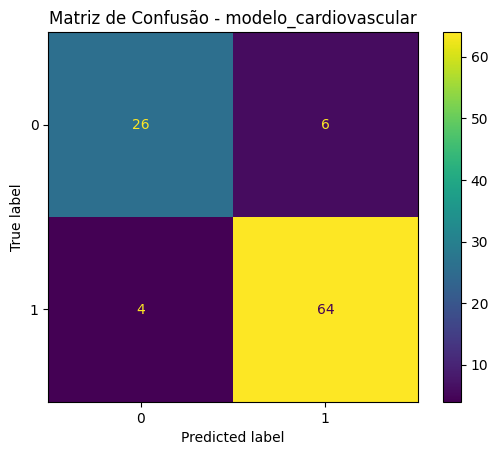

In [1]:
# ////////////////////////////// TREINAR E CRIAR OS MODELOS ///////////////////////////////////

import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib
import os
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def binarizar_colunas(df):
    # Converte 'sim' para 1, 'nao' para 0
    return df.replace({'sim': 1, 'não': 0})

def binarizar_colunas2(df):
    # Converte 'masculino' para 1, 'feminino' para 0
    return df.replace({'F': 0, 'M': 1})

def binarizar_colunas3(df):
    # Converte 'masculino' para 1, 'feminino' para 0
    return df.replace({'feminino': 0, 'masculino': 1})


def treinar_modelo(path_csv, coluna_alvo, nome_modelo):
    df = pd.read_csv(path_csv)
    df = binarizar_colunas(df)
    df = binarizar_colunas2(df)
    df = binarizar_colunas3(df)

    X = df.drop(columns=[coluna_alvo])
    y = df[coluna_alvo]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = RandomForestClassifier(
        n_estimators=100,      # Número de árvores
        max_depth=5,          # Profundidade máxima de cada árvore
        min_samples_split=10,   # Mínimo de amostras para dividir um nó
        class_weight="balanced" # Balanceia classes desiguais   
    )
    clf.fit(X_train, y_train)

    os.makedirs("modelos", exist_ok=True)
    joblib.dump(clf, f"modelos/{nome_modelo}.pkl")
    print(f"Modelo '{nome_modelo}' treinado com sucesso.")

    # Avaliação com matriz de confusão
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred))
    print("Matriz de Confusão:")
    print(cm)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    print(f"Acurácia treino: {train_acc:.2f}")
    print(f"Acurácia teste: {test_acc:.2f}")

    # Exibir matriz graficamente
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Matriz de Confusão - {nome_modelo}")
    plt.show()


# Treinar para diabetes
treinar_modelo("./dados/dados_diabetes.csv", "tem_diabetes", "modelo_diabetes")

# Treinar para hipertensão
treinar_modelo("././dados/dados_hipertensao.csv", "tem_hipertensao", "modelo_hipertensao")

# Treinar para DRC
treinar_modelo("./dados/dados_drc.csv", "tem_drc", "modelo_drc")

# Treinar para DPOC
treinar_modelo("./dados/dados_dpoc.csv", "tem_dpoc", "modelo_dpoc")

# Treinar para ASMA
treinar_modelo("./dados/dados_asma.csv", "tem_asma", "modelo_asma")

# Treinar para Obesidade
treinar_modelo("./dados/dados_obesidade.csv", "tem_obesidade", "modelo_obesidade")

# Treinar para AIDS
treinar_modelo("./dados/dados_aids.csv", "tem_aids", "modelo_aids")

# Treinar para Óssea
treinar_modelo("./dados/dados_ossea.csv", "tem_doenca_ossea", "modelo_ossea")

# Treinar para Cardiovascular
treinar_modelo("./dados/dados_cardiovascular.csv", "tem_doenca_cardiovascular", "modelo_cardiovascular")
